In [485]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas
import urllib
import re

from selenium import webdriver
from time import sleep
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.common.exceptions import NoSuchElementException, WebDriverException

import csv
import time

from tqdm import tqdm_notebook as tqdm

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

import pandas as pd
from sodapy import Socrata

import numpy as np
import datetime

import pandas as pd
pd.set_option("display.max_columns", 2200)
pd.set_option("display.max_rows", 200)
import numpy as np
import seaborn  as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline  
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import re
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Keeping track of runtime.
import timeit

# Decision trees
from sklearn import tree
from IPython.display import Image

# Packages for rendering tree.
import pydotplus
import graphviz

import itertools #(for confusion matrix)

from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [364]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#A quick look at https://www.leafly.com/explore/page-61/sort-alpha shows 
#that this is the last page of strains
pages = 61 
websites = []
strain_names = []

for i in range(pages+1):
    page_url = "https://www.leafly.com/explore/page-"+str(i)+"/sort-alpha"
    html = requests.get(page_url).text
    soup = BeautifulSoup(html,'html.parser')
    urls = soup.findAll("a",{"class":"ga_Explore_Strain_Tile"})
        
    for url in urls:
        strain_name = url.get('href')
        strain_names.append(strain_name)
        website = ("https://www.leafly.com" + strain_name)
        websites.append(website)

In [ ]:
#create url df
url_df = pd.DataFrame(websites, columns = ['url'])

In [ ]:
#create url csv
url_df.to_csv('urls.csv')

In [ ]:
#create strain_names csv
strains_df = pd.DataFrame(strain_names, columns = ['strain_name'])

In [ ]:
#create strain_names csv
strains_df.to_csv('strains.csv')

In [ ]:
#parse strain_name:
parsed =[]
for words in strains_df['strain_name']:
    parse = re.findall(r"[\w']+", words)
    parsed.append(parse)

In [ ]:
#create name and strain df

strain_type_df = pd.DataFrame(parsed, columns = ['strain', 'name1', 'name2',
                                    'name3', 'name4', 'name5', 'name6'])

In [ ]:
#drop last 5 columns - just fillers
strain_type_df.drop(df.tail(5).index,inplace=True)

In [ ]:
#merge name columns
strain_type_df['name'] = strain_type_df[strain_type_df.columns[1:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1)

In [ ]:
#drop unnecessary columns
strain_type_df.drop(['name1', 'name2', 'name3', 'name4', 'name5', 'name6'], axis=1, inplace=True)

In [ ]:
strain_type_df.to_csv('strain_type.csv')

In [ ]:
#number of duplicates
df['name'].duplicated().sum()

In [ ]:
url_df['url'].duplicated().sum()

In [ ]:
url_df.drop_duplicates(inplace=True)

In [ ]:
url_df.reset_index()

In [ ]:
len(url_df)

In [ ]:
#breaking down scraping into smaller buckets

urls_to_200 = urls_df['url'][:200]          #soups
urls_to_700 = urls_df['url'][200:700]       #soups_to_700
urls_to_1200 = urls_df['url'][700:1200]     #soups_to_1200
urls_to_1700 = urls_df['url'][1200:1700]    #soups_to_1700
urls_to_2200 = urls_df['url'][1700:2200]    #soups_to_2200
urls_to_2700 = urls_df['url'][2200:2700]    #soups_to_2700
urls_to_end = urls_df['url'][2700:]         #soups_to_end

#scraping all at once
urls_total = urls_df['url']                 #soups_total

In [ ]:
#scrape individual strain pages

soups_total = []

for url in urls_total:
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')
    soups_total.append(soup)
    time.sleep(1)

In [ ]:
# with open("soups_total.html", "w") as file:
#     file.write(str(soups_total))

### Get Features From Tags

In [ ]:
#use this one

#collect positive effects

effect = []
filename1 = "effect.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'effects-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    effect.append(par)

df_effect = pd.DataFrame(effect)
df_effect.to_csv(filename1)

#collect medical attributes

med = []
filename2 = "med.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'medical-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    med.append(par)

df_med = pd.DataFrame(med)
df_med.to_csv(filename2)

#collect negative attributes

neg = []
filename3 = "neg.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href') 
            strain = strain_name.split('/')
        div = soups_total[i].find('div', {'id': 'negatives-tab-content'})
        first_child = div.findChildren('div', {'class': "histogram-label"})
        try:
            if len(first_child) == 5:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                    first_child[2].text, first_child[3].text, 
                        first_child[4].text]
                par = {key:values}
            
            elif len(first_child) == 4:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text, first_child[3].text]
                par = {key:values}
            
            elif len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                          first_child[2].text]
                par = {key:values}
            
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    neg.append(par)

df_neg = pd.DataFrame(neg)
df_neg.to_csv(filename3)

#collect flavors

flavors = []
filename4 = "flavors.csv"

for i in tqdm(range(0, len(soups_total))): 
    names = []
    cont = soups_total[i].find("a",{"class":"active"})  
    names.append(cont)
    try:
        for name in names:
            strain_name = name.get('href')
            strain = strain_name.split('/')
        first_child = soups_total[i].findAll('div',attrs={"class" : "flavor-name"})
        try:
            if len(first_child) == 3:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text, 
                        first_child[2].text]
                par = {key:values}
            elif len(first_child) == 2:
                key = strain[2]
                values = [first_child[0].text, first_child[1].text]
                par = {key:values}
            elif len(first_child) == 1:
                key = strain[2]
                values = [first_child[0].text]
                par = {key:values}
            else:
                key = strain[2]
                values = None
                par = {key:values}       
        except:
            key = strain[2]
            values = None
            par = {key:values}
    except:
        key = strain[2]
        values = None
        par = {key:values}
    
        
    flavors.append(par)

df_flavors = pd.DataFrame(flavors)
df_flavors.to_csv(filename4)  

# #collect parents of strains

# parents = []

# filename5 = 'parents.csv'

# for i in tqdm(range(0, len(soups_total))): 
#     children = soups_total[i].findAll('div',attrs={"class" : "strain-tile-footer"})
#     try:
#         if len(children) == 3:
#             key = children[0].text
#             values = [children[1].text, children[2].text]
#             par = {key:values}
#         elif len(children) == 2:
#             key = children[0].text
#             values = children[1].text
#             par = {key:values}        
#         else:
#             key = children[0].text
#             values = None
#             par = {key:values}
#     except:
#         None
#         #print("can't find that page")
    
#     parents.append(par)
   

# df_parents = pd.DataFrame(parents)
# df_parents.to_csv(filename5)

In [ ]:
with open('soups_total.html', 'r') as f:
    html = f.read()
soups_total = BeautifulSoup(html,'html.parser')

### Import CSVs

In [3]:
#import categories - hybrid, sativa, indica
cat_df = pd.read_csv('strain_category.csv')

#import flavors
flav_df = pd.read_csv('flavors.csv')

#import parents
par_df = pd.read_csv('parents.csv')

#import effects
eff_df = pd.read_csv('effect.csv')

#import medical
med_df = pd.read_csv('med.csv')

#import negative
neg_df = pd.read_csv('neg.csv')

### Pivot Tables/Table Formatting

In [4]:
#drop first column
def drop_column(df):
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
drop_column(flav_df)
drop_column(par_df)
drop_column(eff_df)
drop_column(med_df)
drop_column(neg_df)
drop_column(cat_df)

In [6]:
#pivot tables so that column names are now indices
flav_series = flav_df.stack()
par_series = par_df.stack()
eff_series = eff_df.stack()
med_series = med_df.stack()
neg_series = neg_df.stack()

#convert from series to dataframe
flav_df = flav_series.to_frame(name='flavor')
par_df = par_series.to_frame(name='parent')
eff_df = eff_series.to_frame(name='effect')
med_df = med_series.to_frame(name='medical')
neg_df = neg_series.to_frame(name='negative')

#dataframe cleanup
def reset_index(df):
    df.reset_index(inplace=True)
    df.drop('level_0', axis=1, inplace=True)
    df.rename(columns={'level_1':'strain'}, inplace=True)

In [7]:
reset_index(flav_df)
reset_index(par_df)
reset_index(eff_df)
reset_index(med_df)
reset_index(neg_df)

In [8]:
#cat_df.reset_index('name', inplace=True)
cat_df.rename(columns={'strain':'category'}, inplace=True)
cat_df.rename(columns={'name':'strain'}, inplace=True)

#remove $ from parents table
par_df['strain'] = [x.strip('$') for x in par_df.strain]

#make all entries lowercase
flav_df = flav_df.apply(lambda x: x.astype(str).str.lower())
par_df = par_df.apply(lambda x: x.astype(str).str.lower())
eff_df = eff_df.apply(lambda x: x.astype(str).str.lower())
med_df = med_df.apply(lambda x: x.astype(str).str.lower())
neg_df = neg_df.apply(lambda x: x.astype(str).str.lower())
cat_df = cat_df.apply(lambda x: x.astype(str).str.lower())


#replace - with space in all tables
flav_df['strain'] = flav_df['strain'].str.replace('-',' ')
par_df['strain'] = par_df['strain'].str.replace('-',' ')
eff_df['strain'] = eff_df['strain'].str.replace('-',' ')
med_df['strain'] = med_df['strain'].str.replace('-',' ')
neg_df['strain'] = neg_df['strain'].str.replace('-',' ')
cat_df['strain'] = cat_df['strain'].str.replace('-',' ')


# #make all data lowercase
# def lowercase(df):
#     df = df.apply(lambda x: x.astype(str).str.lower())
#     return
    
# #replace dash with space in all tables
# def replace_dash(df, column):
#     df[column] = df[column].str.replace('-',' ')
#     return

In [9]:
def remove_char(df, column):
    df[column] = df[column].str.replace('[',' ')
    df[column] = df[column].str.replace(']',' ')
    df[column] = df[column].str.replace("'",'')
    

def new_columns_5(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]


    new2 = df[str(column) + '_2'].str.split(',', n = 1, expand = True)  
    df[str(column) + '_2']= new2[0] 
    df[str(column) + '_3']= new2[1] 
  
    new3 = df[str(column) + '_3'].str.split(',', n = 1, expand = True)
    df[str(column) + '_3']= new3[0]
    df[str(column) + '_4']= new3[1]


    new4 = df[str(column) + '_4'].str.split(',', n = 1, expand = True)
    df[str(column) + '_4']= new4[0]
    df[str(column) + '_5']= new4[1]


    #dropping old name columns 
    df.drop(columns =[column], inplace = True) 
    
def new_columns_3(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]


    new2 = df[str(column) + '_2'].str.split(',', n = 1, expand = True)  
    df[str(column) + '_2']= new2[0] 
    df[str(column) + '_3']= new2[1] 
  
    new3 = df[str(column) + '_3'].str.split(',', n = 1, expand = True)
    df[str(column) + '_3']= new3[0]

    #dropping old name columns 
    df.drop(columns =[column], inplace = True) 
    
def new_columns_2(df, column):    
    
    # new data frame with split value columns 
    # making separate first flavor from new data frame 
    new1 = df[column].str.split(',', n = 1, expand = True)   
    df[str(column) + '_1'] = new1[0] 
    df[str(column) + '_2'] = new1[1]

    #dropping old name columns 
    df.drop(columns =[column], inplace = True)

In [10]:
remove_char(flav_df, 'flavor')
remove_char(par_df, 'parent')
remove_char(eff_df, 'effect')
remove_char(med_df, 'medical')
remove_char(neg_df, 'negative')
remove_char(cat_df, 'category')

In [11]:
new_columns_5(eff_df, 'effect')
new_columns_5(med_df, 'medical')
new_columns_5(neg_df, 'negative')

In [12]:
new_columns_3(flav_df, 'flavor')
new_columns_2(par_df, 'parent')

In [13]:
par_df['strain'] = par_df['strain'].str.replace("'",'')

### Create Final Merged Dataframe

In [16]:
#create properly formatted csvs

flav_final_df = pd.DataFrame(flav_df)
flav_final_df.to_csv('flav_final_df.csv')

par_final_df = pd.DataFrame(par_df)
par_final_df.to_csv('par_final_df.csv')

eff_final_df = pd.DataFrame(eff_df)
eff_final_df.to_csv('eff_final_df.csv')

med_final_df = pd.DataFrame(med_df)
med_final_df.to_csv('med_final_df.csv')

neg_final_df = pd.DataFrame(neg_df)
neg_final_df.to_csv('neg_final_df.csv')

cat_final_df = pd.DataFrame(cat_df)
cat_final_df.to_csv('cat_final_df.csv')

In [17]:
#import final csvs

flav_df = pd.read_csv('flav_final_df.csv')
par_df = pd.read_csv('par_final_df.csv')
eff_df = pd.read_csv('eff_final_df.csv')
med_df = pd.read_csv('med_final_df.csv')
neg_df = pd.read_csv('neg_final_df.csv')
cat_df = pd.read_csv('cat_final_df.csv')

In [18]:
#create master dataframe
drop_column(flav_df)
drop_column(par_df)
drop_column(eff_df)
drop_column(med_df)
drop_column(neg_df)
drop_column(cat_df)

final_df = pd.merge(cat_df, eff_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, med_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, neg_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, flav_df, how='outer')
final_df.drop_duplicates(inplace=True)
final_df = pd.merge(final_df, par_df, how='outer')
final_df.drop_duplicates(inplace=True)

final_df.to_csv('final_df.csv')

In [289]:
total_reviews = pd.read_csv('total_reviews.csv')

In [292]:
final_df = pd.merge(final_df, total_reviews, how='outer')

In [294]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [297]:
final_df.drop_duplicates(inplace=True)

In [303]:
# final_df.to_csv('final_df.csv')

In [516]:
final_df = pd.read_csv('final_df.csv')

In [518]:
final_df.drop('parent_1', axis=1, inplace=True)

In [519]:
final_df.drop('parent_2', axis=1, inplace=True)

In [512]:
master_parent = pd.read_csv('master_parent.csv')

In [521]:
final_df = pd.merge(final_df, master_parent, on='strain')

In [525]:
final_df.drop('Unnamed: 0_y', axis=1, inplace=True)

In [527]:
final_df.drop('Unnamed: 0_x', axis=1, inplace=True)

In [530]:
final_df.drop_duplicates(inplace=True)

In [533]:
# final_df.to_csv('master_final.csv')

In [ ]:
""" I needed to rescrape to get additional information and in the process my ip got blocked.
    I moved to working in smaller scrape batches. I then needed to append each of my smaller
    batches into a master table. """

In [80]:
urls = pd.read_csv('urls.csv')

In [194]:
urls_list = urls['url']

In [423]:
#urls_to_156 = urls_list[:156]                  #parents1.csv
#urls_156_to_312 = urls_list[156:312]           #parents2.csv
#urls_312_to_468 = urls_list[312:468]           #parents3.csv
#urls_468_to_624 = urls_list[468:624]           #parents4.csv
#urls_624_to_780 = urls_list[624:780]           #parents5.csv
#urls_780_to_936 = urls_list[780:936]            #parents6.csv
#urls_936_to_1092 = urls_list[936:1092]          #parents7.csv
#urls_1092_to_1248 = urls_list[1092:1248]        #parents8.csv
#urls_1248_to_1404 = urls_list[1248:1404]        #parents9.csv
#urls_1404_to_1560 = urls_list[1404:1560]        #parents10.csv
urls_1560_to_1716 = urls_list[1560:1716]        #parents11.csv
urls_1716_to_1872 = urls_list[1716:1872]        #parents12.csv
urls_1872_to_2028 = urls_list[1872:2028]        #parents13.csv
urls_2028_to_2184 = urls_list[2028:2184]        #parents14.csv
urls_2184_to_2340 = urls_list[2184:2340]        #parents15.csv
urls_2340_to_2496 = urls_list[2340:2496]        #parents16.csv
urls_2496_to_2652 = urls_list[2496:2652]        #parents17.csv
urls_2652_to_2808 = urls_list[2652:2808]        #parents18.csv
urls_2808_to_2964 = urls_list[2808:2964]        #parents19.csv
urls_2964_to_3120 = urls_list[2964:3120]        #parents20.csv
urls_3120_to_3276 = urls_list[3120:3276]        #parents21.csv
urls_3276_to_3432 = urls_list[3276:]            #parents22.csv


#urls_1560_to_2060 = urls_list[1560:2060]         #parents11.csv
#urls_2060_to_2560 = urls_list[2060:2560]         #parents12.csv
#urls_2560_to_3060 = urls_list[2560:3060]         #parents13.csv
#urls_3060_to_end = urls_list[3060:]              #parents14.csv

In [253]:
# #scrape for review totals and parents

parents = []
reviews = []

for url in tqdm(urls_list):
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')

    try:
        container = soup.find("a",{"class":"active"})  
        strain_name = container.get('href') 
        strain = strain_name.split('/')
    except:
        None
    
    try:
        parent = soup.findAll('div',attrs={"class" : "strain-tile-footer"})
        parents.append(parent)
    except:
        parents.append(strain[2], None)
    
    try:
        container = soup.find("a",{"class":"active"})  
        strain_name = container.get('href') 
        strain = strain_name.split('/')
        review_total = soup.find('a',attrs={"onclick" : "window.strainHelpers.trackEvent('User Interactions', 'Strain Details', 'View all Reviews')"}).text
        review = review_total[review_total.find("(")+1:review_total.find(")")]
        rev_name = [strain[2], review]
    except:
        rev_name = [strain[2], None]
    
    reviews.append(rev_name)

time.sleep(1)

TypeError: append() takes exactly one argument (2 given)

In [428]:
#scrape for parents
# change varaible in 6 places

parents14_ = []

for url in tqdm(urls_3060_to_end):
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html.parser')

    try:

        children = soup.findAll('div',attrs={"class" : "strain-tile-footer"})
        parents14_.append(children)
    
    except:
        None

    time.sleep(2)        
 
parents14 = pd.DataFrame(parents14_)
parents14.to_csv('parents14.csv')

In [205]:
review_totals = pd.DataFrame(reviews)
review_totals.to_csv('review_totals.csv')

In [277]:
parents_final = pd.DataFrame(parents)
parents_final.to_csv('parents_final.csv')

In [208]:
review_totals.rename(columns=({0:'strain', 1:'review_total'}), inplace=True)

In [278]:
review_totals.to_csv('review_totals.csv')
parents_final.to_csv('parents_final.csv')

In [279]:
review_totals = pd.read_csv('review_totals.csv')
parents_final = pd.read_csv('parents_final.csv')

In [ ]:
total_reviews = pd.read_csv('review_totals.csv')

In [ ]:
total_reviews.drop('Unnamed: 0', axis = 1, inplace=True)

In [ ]:
total_reviews.drop('Unnamed: 0.1', axis = 1, inplace=True)

In [ ]:
total_reviews['strain'] = total_reviews['strain'].str.replace('-',' ')

In [ ]:
total_reviews.to_csv('total_reviews.csv')

In [ ]:
parents = pd.read_csv('parents_final.csv')

In [ ]:
final = pd.read_csv('final_df.csv')

In [ ]:
parent1a = pd.read_csv('parents1.csv')
parent2a = pd.read_csv('parents2.csv')
parent3a = pd.read_csv('parents3.csv')
parent4a = pd.read_csv('parents4.csv')
parent5a = pd.read_csv('parents5.csv')
parent6a = pd.read_csv('parents6.csv')
parent7a = pd.read_csv('parents7.csv')
parent8a = pd.read_csv('parents8.csv')
parent9a = pd.read_csv('parents9.csv')
parent10a = pd.read_csv('parents10.csv')
parent11a = pd.read_csv('parents11.csv')
parent12a = pd.read_csv('parents12.csv')
parent13a = pd.read_csv('parents13.csv')
parent14a = pd.read_csv('parents14.csv')
# parent15a = pd.read_csv('parents15.csv')
# parent16a = pd.read_csv('parents16.csv')
# parent17a = pd.read_csv('parents17.csv')
# parent18a = pd.read_csv('parents18.csv')
# parent19a = pd.read_csv('parents19.csv')
# parent20a = pd.read_csv('parents20.csv')
# parent21a = pd.read_csv('parents21.csv')
# parent22a = pd.read_csv('parents22.csv')

In [ ]:
append_list = [parent2a, parent3a, parent4a, parent5a, parent6a, parent7a,
              parent8a, parent9a, parent10a, parent11a, parent12a, parent13a,
              parent14a]             

In [ ]:
master_df = parent1a.append(append_list, ignore_index = True) 

In [ ]:
# master_df.to_csv('master_df.csv')

In [ ]:
master_df = pd.read_csv('master_df.csv')

In [ ]:
def split_string(string):
    try:
        return re.findall('<div class="strain-tile-footer">(.+)</div>', string)
    except:
        return 'n'

In [ ]:
master_df['7'] = master_df['7'].apply(split_string)
master_df.replace('N, o, n, e', 'n')
master_df['7'] = master_df['7'].apply(', '.join)
master_df['7'] = [x.strip('$') for x in master_df['7']]
master_df['7'] = master_df['7'].str.lower()

In [ ]:
def format_values(df, column):
    df[column] = df[column].apply(split_string)
    df[column] = df[column].apply(', '.join)
    df[column] = [x.strip('$') for x in df[column]]
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace("'",'')
    df[column] = df[column].str.replace(".",'')
    df[column] = df[column].str.replace("#",'')

In [ ]:
format_values(master_df, '7')

In [ ]:
master_df.rename(columns={'0': 'strain', '1':'parent_1', '2':'parent_2',
                         '3':'parent_3', '4':'parent_4', '5':'parent_5',
                         '6':'parent_6', '7':'parent_7'}, inplace=True)

In [ ]:
master_df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [ ]:
# master_df.to_csv('master_parent.csv')

In [453]:
#df to dummy
final_df = pd.read_csv('master_final.csv')
final_df.drop('Unnamed: 0', axis=1, inplace=True)
#strip leading numbers from flavors columns
final_df['flavor_1'] = final_df['flavor_1'].str.strip('1. ')
final_df['flavor_2'] = final_df['flavor_2'].str.strip('2. ')
final_df['flavor_3'] = final_df['flavor_3'].str.strip('3. ')
final_df.fillna('none', inplace=True)

In [454]:
def clean(df, column): 
    df[column] = df[column].str.replace('"','')
    df[column] = df[column].str.replace('#','')
    df[column] = df[column].str.replace(' ','')

In [455]:
clean(final_df, 'effect_1')
clean(final_df, 'effect_2')
clean(final_df, 'effect_3')
clean(final_df, 'effect_4')
clean(final_df, 'effect_5')
clean(final_df, 'medical_1')
clean(final_df, 'medical_2')
clean(final_df, 'medical_3')
clean(final_df, 'medical_4')
clean(final_df, 'medical_5')
clean(final_df, 'negative_1')
clean(final_df, 'negative_2')
clean(final_df, 'negative_3')
clean(final_df, 'negative_4')
clean(final_df, 'negative_5')
clean(final_df, 'flavor_1')
clean(final_df, 'flavor_2')
clean(final_df, 'flavor_3')

### Dummy Categories

In [456]:
category_dummies = pd.get_dummies(final_df['category'], prefix="cat_")
effect1_dummies = pd.get_dummies(final_df['effect_1'], prefix="eff1_")
effect2_dummies = pd.get_dummies(final_df['effect_2'], prefix="eff2_")
effect3_dummies = pd.get_dummies(final_df['effect_3'], prefix="eff3_")
effect4_dummies = pd.get_dummies(final_df['effect_4'], prefix="eff4_")
effect5_dummies = pd.get_dummies(final_df['effect_5'], prefix="eff5_")
med1_dummies = pd.get_dummies(final_df['medical_1'], prefix="med1_")
med2_dummies = pd.get_dummies(final_df['medical_2'], prefix="med2_")
med3_dummies = pd.get_dummies(final_df['medical_3'], prefix="med3_")
med4_dummies = pd.get_dummies(final_df['medical_4'], prefix="med4_")
med5_dummies = pd.get_dummies(final_df['medical_5'], prefix="med5_")
neg1_dummies = pd.get_dummies(final_df['negative_1'], prefix="neg1_")
neg2_dummies = pd.get_dummies(final_df['negative_2'], prefix="neg2_")
neg3_dummies = pd.get_dummies(final_df['negative_3'], prefix="neg3_")
neg4_dummies = pd.get_dummies(final_df['negative_4'], prefix="neg4_")
neg5_dummies = pd.get_dummies(final_df['negative_5'], prefix="neg5_")
flav1_dummies = pd.get_dummies(final_df['flavor_1'], prefix="flav1_")
flav2_dummies = pd.get_dummies(final_df['flavor_2'], prefix="flav2_")
flav3_dummies = pd.get_dummies(final_df['flavor_3'], prefix="flav3_")


final_df = pd.concat([final_df, category_dummies],axis=1)
final_df = pd.concat([final_df, effect1_dummies],axis=1)
final_df = pd.concat([final_df, effect2_dummies],axis=1)
final_df = pd.concat([final_df, effect3_dummies],axis=1)
final_df = pd.concat([final_df, effect4_dummies],axis=1)
final_df = pd.concat([final_df, effect5_dummies],axis=1)
final_df = pd.concat([final_df, med1_dummies],axis=1)
final_df = pd.concat([final_df, med2_dummies],axis=1)
final_df = pd.concat([final_df, med3_dummies],axis=1)
final_df = pd.concat([final_df, med4_dummies],axis=1)
final_df = pd.concat([final_df, med5_dummies],axis=1)
final_df = pd.concat([final_df, neg1_dummies],axis=1)
final_df = pd.concat([final_df, neg2_dummies],axis=1)
final_df = pd.concat([final_df, neg3_dummies],axis=1)
final_df = pd.concat([final_df, neg4_dummies],axis=1)
final_df = pd.concat([final_df, neg5_dummies],axis=1)
final_df = pd.concat([final_df, flav1_dummies],axis=1)
final_df = pd.concat([final_df, flav2_dummies],axis=1)
final_df = pd.concat([final_df, flav3_dummies],axis=1)

In [457]:
to_drop = ['category', 'effect_1', 'effect_2', 'effect_3', 'effect_4',
          'effect_5', 'medical_1', 'medical_2', 'medical_3', 'medical_4',
          'medical_5', 'negative_1', 'negative_2', 'negative_3', 'negative_4',
          'negative_5', 'flavor_1', 'flavor_2', 'flavor_3']
final_df.drop(to_drop, axis=1, inplace=True)

In [458]:
to_drop = ['review_total', 'parent_1', 'parent_2', 
           'parent_3', 'parent_4', 'parent_5', 
           'parent_6', 'parent_7']

final_df.drop(to_drop, axis=1, inplace=True)

### Create Clusters Using KNN

#### Create Clusters

In [472]:
features = final_df.drop('strain',axis=1)
nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(features)
distances, indices = nbrs.kneighbors(features)

#### Query

In [502]:
def get_index_from_name(strain):
    return final_df[final_df['strain']==strain].index.tolist()[0]

def print_similar_strains(query=None):
    found_id = get_index_from_name(query)
    for id in indices[found_id][1:]:
        print(final_df.ix[id]['strain'])

In [505]:
print_similar_strains('jack herer')

alaskan thunder fuck
candyland
sour tangie
sour diesel
super silver haze
lambs bread
maui wowie
durban cookies
jack the ripper
acapulco gold


In [ ]:
#from vectorized tokens

# 'alaskan thunder fuck',
#  'durban poison',
#  'red congolese',
#  'green crack',
#  'red haze',
#  'white durban',
#  'buffalo bill',
#  'acapulco gold',
#  'incredible hulk',
#  'kali mist']

#### df not dummied

In [463]:
#df that isn't dummied

unedited_df = pd.read_csv('master_final.csv')
unedited_df.drop('Unnamed: 0', axis=1, inplace=True)
unedited_df.fillna('none', inplace=True)

#strip leading numbers from flavors columns
unedited_df['flavor_1'] = unedited_df['flavor_1'].str.strip('1. ')
unedited_df['flavor_2'] = unedited_df['flavor_2'].str.strip('2. ')
unedited_df['flavor_3'] = unedited_df['flavor_3'].str.strip('3. ')

to_drop = ['review_total', 'parent_1', 'parent_2', 
           'parent_3', 'parent_4', 'parent_5', 
           'parent_6', 'parent_7']

unedited_df.drop(to_drop, axis=1, inplace=True)

In [464]:
clean(unedited_df, 'effect_1')
clean(unedited_df, 'effect_2')
clean(unedited_df, 'effect_3')
clean(unedited_df, 'effect_4')
clean(unedited_df, 'effect_5')
clean(unedited_df, 'medical_1')
clean(unedited_df, 'medical_2')
clean(unedited_df, 'medical_3')
clean(unedited_df, 'medical_4')
clean(unedited_df, 'medical_5')
clean(unedited_df, 'negative_1')
clean(unedited_df, 'negative_2')
clean(unedited_df, 'negative_3')
clean(unedited_df, 'negative_4')
clean(unedited_df, 'negative_5')
clean(unedited_df, 'flavor_1')
clean(unedited_df, 'flavor_2')
clean(unedited_df, 'flavor_3')

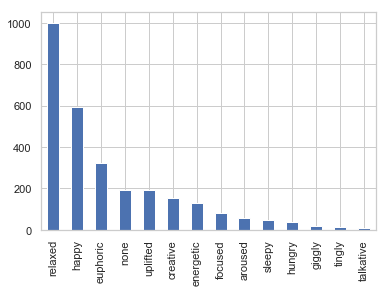

In [466]:
pd.value_counts(unedited_df['effect_1']).plot.bar()
plt.show()

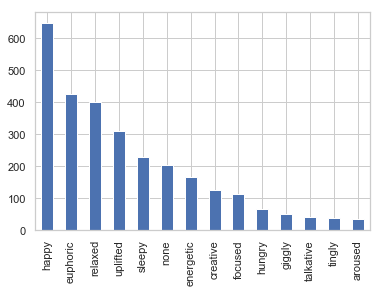

In [467]:
pd.value_counts(unedited_df['effect_2']).plot.bar()
plt.show()

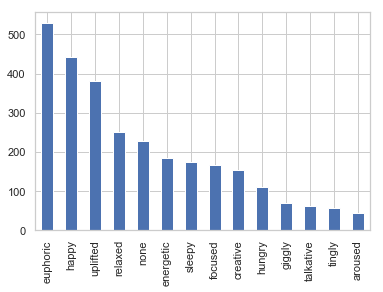

In [468]:
pd.value_counts(unedited_df['effect_3']).plot.bar()
plt.show()

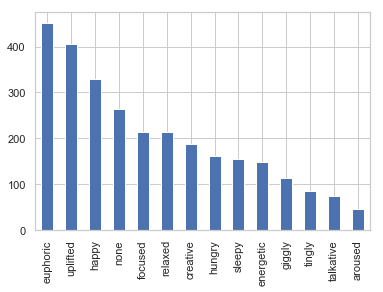

In [469]:
pd.value_counts(unedited_df['effect_4']).plot.bar()
plt.show()

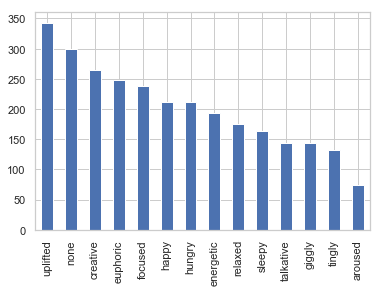

In [470]:
pd.value_counts(unedited_df['effect_5']).plot.bar()
plt.show()

### Vectorization

In [506]:
#move category column to end
df1 = unedited_df.pop('category')
unedited_df['category']=df1

unedited_df['combined'] = unedited_df[unedited_df.columns[1:]].apply(
    lambda x: ','.join(x), axis=1)

In [483]:
unedited_df['combined'][0]

'happy uplifted relaxed euphoric sleepy stress pain depression insomnia lackofappetite drymouth dizzy dryeyes anxious paranoid earthy diesel pungent hybrid'

In [486]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(unedited_df['combined'])

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [498]:
# creating a Series for the strains so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(unedited_df.index)

#  defining the function that takes in strain 
# as input and returns the top 10 recommended strains
def recommended_strains(strain, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended movies
    recommended_strains = []
    
    # gettin the index of the strain that matches the strain
    idx = final_df[final_df['strain']==strain].index[0]
    
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar strains
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching strains
    for i in top_10_indexes:
        recommended_strains.append((unedited_df.ix[i]['strain']))
        #unedited_df.ix[id]['strain']
    return recommended_strains

In [499]:
recommended_strains('jack herer')

['alaskan thunder fuck',
 'durban poison',
 'red congolese',
 'green crack',
 'red haze',
 'white durban',
 'buffalo bill',
 'acapulco gold',
 'incredible hulk',
 'kali mist']

### Feature Selection

In [404]:
X.columns

Index(['cat__hybrid', 'cat__indica', 'cat__sativa', 'eff1__aroused',
       'eff1__creative', 'eff1__energetic', 'eff1__euphoric', 'eff1__focused',
       'eff1__giggly', 'eff1__happy',
       ...
       'flav3__strawberry', 'flav3__sweet', 'flav3__tar', 'flav3__tea',
       'flav3__tobacco', 'flav3__treefruit', 'flav3__tropical',
       'flav3__vanilla', 'flav3__violet', 'flav3__woody'],
      dtype='object', length=327)

#### Use F-Test to View Top Variables

In [509]:
selector=SelectKBest(f_regression, k=40)
selector.fit(features, final_df.index)
best_columns = features.columns[selector.get_support()]
other_columns = features.columns[~selector.get_support()]

In [510]:
best_columns

Index(['cat__sativa', 'eff1__sleepy', 'eff1__uplifted', 'eff2__giggly',
       'eff2__talkative', 'eff3__hungry', 'eff4__creative', 'eff4__energetic',
       'eff5__sleepy', 'med1__nausea', 'med2__cramps', 'med2__inflammation',
       'med2__lackofappetite', 'med2__none', 'med3__fatigue', 'med4__pain',
       'med5__musclespasms', 'med5__seizures', 'neg2__dizzy', 'neg2__dryeyes',
       'flav1__blueberry', 'flav1__bluecheese', 'flav1__cheese',
       'flav1__lemon', 'flav1__pineapple', 'flav1__sage', 'flav1__strawberry',
       'flav1__violet', 'flav2__blueberry', 'flav2__butter', 'flav2__cheese',
       'flav2__citrus', 'flav2__orange', 'flav2__peach', 'flav2__strawberry',
       'flav2__vanilla', 'flav2__violet', 'flav3__blueberry',
       'flav3__strawberry', 'flav3__sweet'],
      dtype='object')

#### Use Recursive Feature Elimination

In [511]:
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')
selector.fit(features, final_df.index)

RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [512]:
selected_columns = features.columns[selector.support_]
removed_columns = features.columns[~selector.support_]

In [513]:
selected_columns

Index(['neg1__headache', 'neg5__drymouth'], dtype='object')

In [514]:
removed_columns

Index(['cat__hybrid', 'cat__indica', 'cat__sativa', 'eff1__aroused',
       'eff1__creative', 'eff1__energetic', 'eff1__euphoric', 'eff1__focused',
       'eff1__giggly', 'eff1__happy',
       ...
       'flav3__strawberry', 'flav3__sweet', 'flav3__tar', 'flav3__tea',
       'flav3__tobacco', 'flav3__treefruit', 'flav3__tropical',
       'flav3__vanilla', 'flav3__violet', 'flav3__woody'],
      dtype='object', length=325)

#### Removing Variables Based on Correlation Coeeficient

In [ ]:
#Plots a heatmap of correlation between features with masking
fig, ax = tqdm(plt.subplots(figsize=(20,20)))
mask=tqdm(np.zeros_like(final_df.corr(), dtype=np.bool))
mask[np.triu_indices_from(mask)] = True
color_map = sns.color_palette("hot_r")
ax = sns.heatmap(final_df.corr(), cmap = color_map, mask=mask, square=True, annot=True)

#### Modeling with Removed Features